In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
# Load the csv
df=pd.read_csv("List of Countries by Sugarcane Production.csv")

In [3]:
# Print the 1st 5 entries
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
# Get the Shape
df.shape

(103, 7)

## Data Cleaning

In [5]:
# Remove the decimal notation
df["Production (Tons)"]=df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(".","")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(".","")


In [6]:
df

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...,...
98,98,Lebanon,Asia,97,16,3,"28386,4"
99,99,Djibouti,Africa,53,51,NaN,NaN
100,100,Singapore,Asia,50,9,2,25
101,101,Samoa,Oceania,12,6,1,"11949,8"


In [7]:
# Check if we have null values
df.isna().sum()

Unnamed: 0                    0
Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [8]:
df[df["Acreage (Hectare)"].isnull()]

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,99,Djibouti,Africa,53,51,NaN,NaN


In [9]:
df=df.dropna().reset_index()

In [10]:
df.head()

,index,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,1,1,India,Asia,348448000,260721,4950000,"70393,5"
2,2,2,China,Asia,123059739,88287,1675215,"73459,1"
3,3,3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,4,4,Pakistan,Asia,65450704,324219,1130820,57879


In [11]:
df.drop(["index", "Unnamed: 0"], axis=1, inplace=True)

In [12]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,"3668,531",10226205,"75167,5"
1,India,Asia,348448000,260721,4950000,"70393,5"
2,China,Asia,123059739,88287,1675215,"73459,1"
3,Thailand,Asia,87468496,"1264,303",1336575,"65442,2"
4,Pakistan,Asia,65450704,324219,1130820,57879


In [13]:
df.dtypes

Country                       object
Continent                     object
Production (Tons)             object
Production per Person (Kg)    object
Acreage (Hectare)             object
Yield (Kg / Hectare)          object
dtype: object

In [14]:
# Convert the values into floating type
df["Production (Tons)"]=df["Production (Tons)"].str.replace(",","")
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].str.replace(",","")
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].str.replace(",","")
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].str.replace(",","")



df["Production (Tons)"]=df["Production (Tons)"].astype(float)
df["Production per Person (Kg)"]=df["Production per Person (Kg)"].astype(float)
df["Acreage (Hectare)"]=df["Acreage (Hectare)"].astype(float)
df["Yield (Kg / Hectare)"]=df["Yield (Kg / Hectare)"].astype(float)


In [15]:
df.nunique()

Country                       102
Continent                       6
Production (Tons)             102
Production per Person (Kg)    101
Acreage (Hectare)             101
Yield (Kg / Hectare)          102
dtype: int64

 ## Univariate Analysis

How many countries produce sugarcane from each continent?

In [16]:
df["Continent"].value_counts()

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

<Axes: xlabel='Continent'>

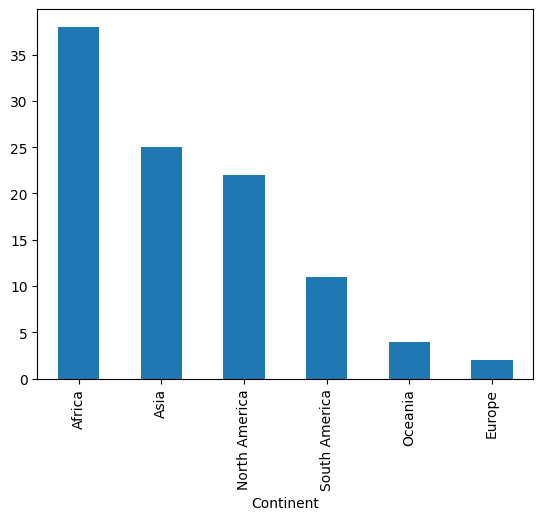

In [17]:
df["Continent"].value_counts().plot(kind="bar")

/tmp/ipykernel_6612/2568663748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production (Tons)"])
/tmp/ipykernel_6612/2568663748.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Production per Person (Kg)"])
/tmp/ipykernel_6612/2568663748.py:9: UserWarning: 

`distplot` is a dep

<Axes: xlabel='Yield (Kg / Hectare)', ylabel='Density'>

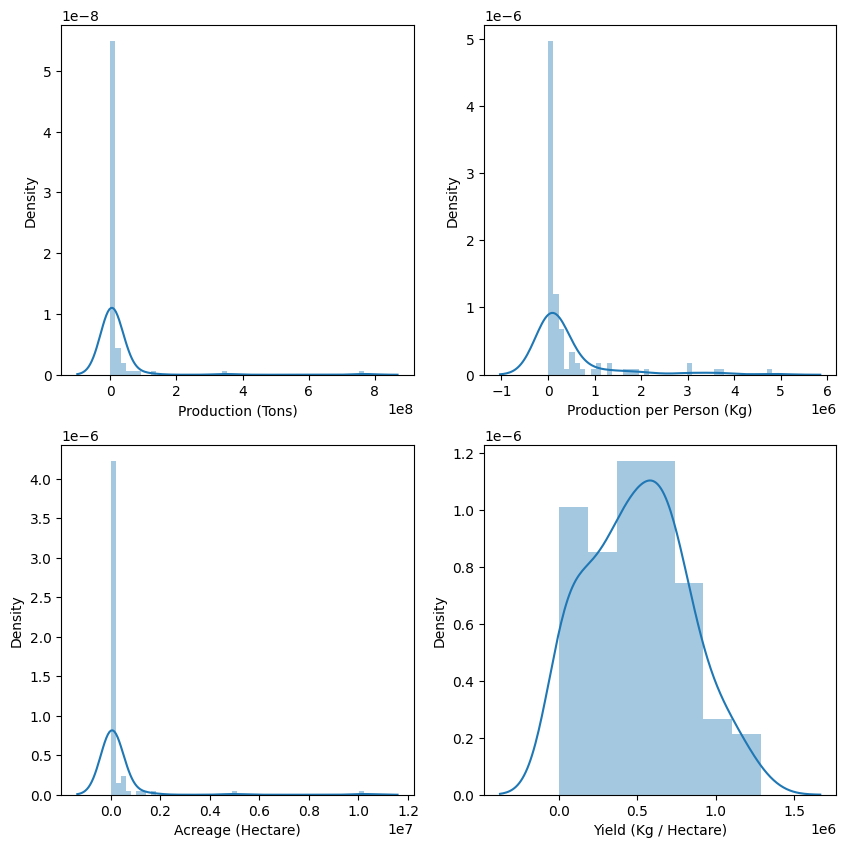

In [18]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.distplot(df["Production (Tons)"])

plt.subplot(2,2,2)
sns.distplot(df["Production per Person (Kg)"])

plt.subplot(2,2,3)
sns.distplot(df["Acreage (Hectare)"])

plt.subplot(2,2,4)
sns.distplot(df["Yield (Kg / Hectare)"])

<Axes: ylabel='Yield (Kg / Hectare)'>

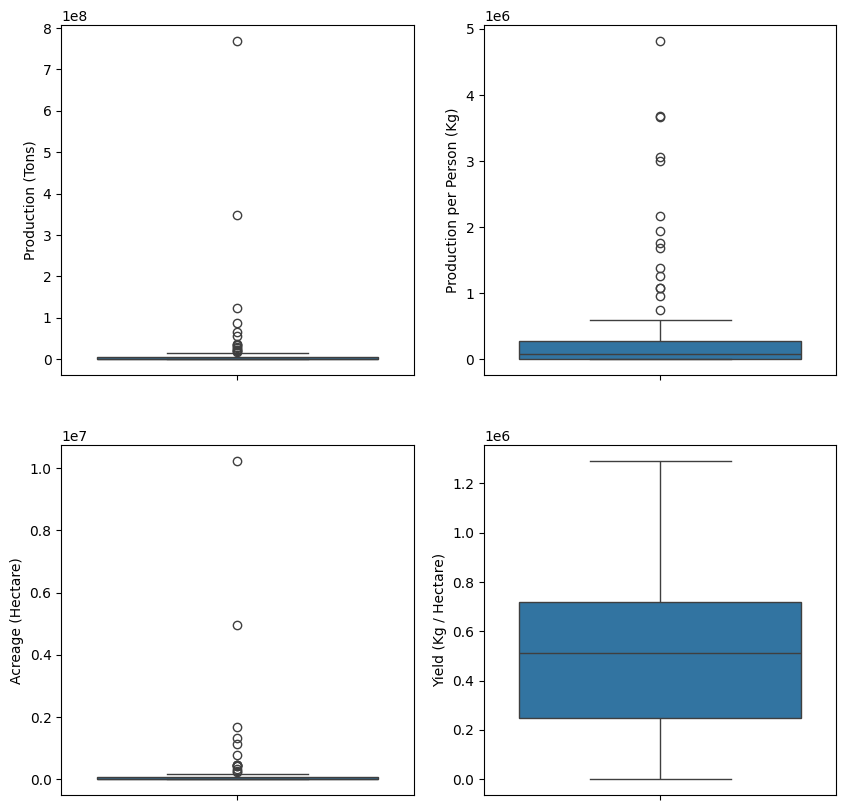

In [19]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(df["Production (Tons)"])

plt.subplot(2,2,2)
sns.boxplot(df["Production per Person (Kg)"])

plt.subplot(2,2,3)
sns.boxplot(df["Acreage (Hectare)"])

plt.subplot(2,2,4)
sns.boxplot(df["Yield (Kg / Hectare)"])

In [20]:
df.describe()

,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
count,1.020000e+02,1.020000e+02,1.020000e+02,1.020000e+02
mean,1.850372e+07,4.124805e+05,2.498981e+05,5.018502e+05
std,8.419149e+07,8.669140e+05,1.137003e+06,3.169530e+05
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
25%,6.251875e+04,1.075225e+04,1.104000e+03,2.487505e+05
50%,1.440044e+06,8.135850e+04,1.655800e+04,5.102500e+05
75%,6.426824e+06,2.828128e+05,8.047400e+04,7.198920e+05
max,7.686784e+08,4.816299e+06,1.022620e+07,1.290493e+06


# BiVariate analysis

Which country produces maximum sugarcane?

In [21]:
df_new=df[["Country", "Production (Tons)"]].set_index("Country")

In [22]:
df_new

,Production (Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


In [23]:
df_new["Production (Tons)_percent"]=(df_new["Production (Tons)"]/df_new["Production (Tons)"].sum())*100

In [24]:
df_new

,Production (Tons),Production (Tons)_percent
Country,,
Brazil,768678382.0,4.072729e+01
India,348448000.0,1.846200e+01
China,123059739.0,6.520138e+00
Thailand,87468496.0,4.634389e+00
Pakistan,65450704.0,3.467809e+00
...,...,...
Spain,394.0,2.087551e-05
Lebanon,97.0,5.139401e-06
Singapore,50.0,2.649176e-06


<Axes: ylabel='Production (Tons)_percent'>

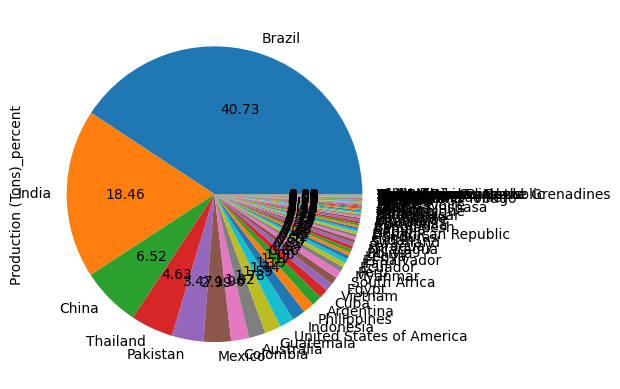

In [25]:
df_new["Production (Tons)_percent"].plot(kind="pie",autopct="%.2f")

/tmp/ipykernel_6612/3621280001.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

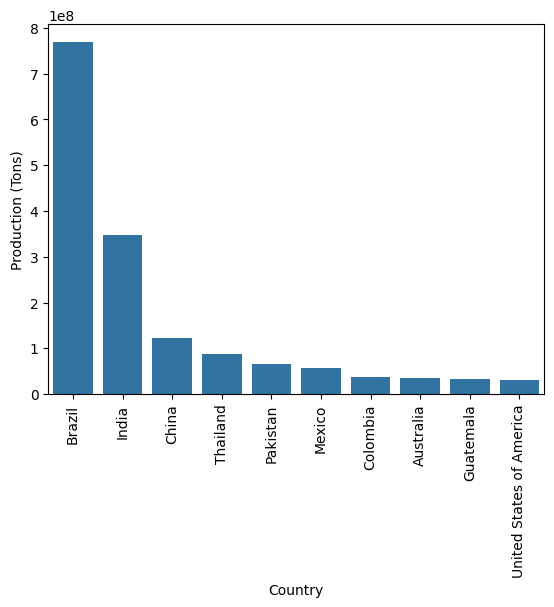

In [28]:
ax=sns.barplot(data=df.head(10), x="Country", y="Production (Tons)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

#Which Country has the highest land?

/tmp/ipykernel_6612/268081316.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


[Text(0, 0, 'Brazil'),
 Text(1, 0, 'India'),
 Text(2, 0, 'China'),
 Text(3, 0, 'Thailand'),
 Text(4, 0, 'Pakistan'),
 Text(5, 0, 'Mexico'),
 Text(6, 0, 'Colombia'),
 Text(7, 0, 'Australia'),
 Text(8, 0, 'Guatemala'),
 Text(9, 0, 'United States of America')]

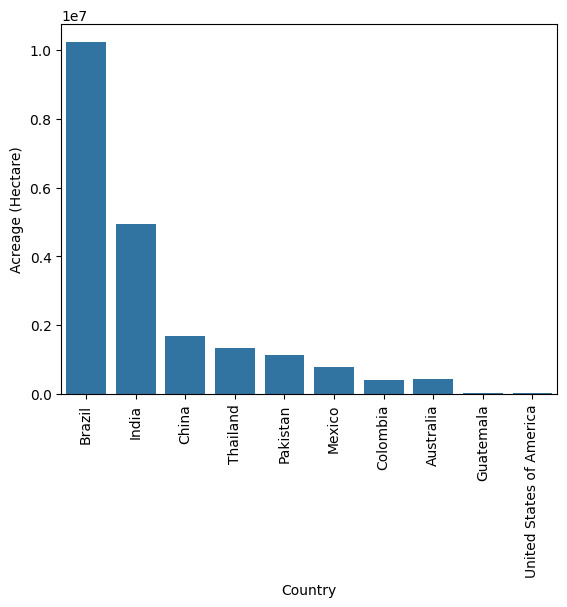

In [29]:
ax=sns.barplot(data=df.head(10), x="Country", y="Acreage (Hectare)")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)